# BUSINESS UNDERSTANDING

##  OBJECTIVE

The company is launching a new movie studio and seeks to produce films that achieve both high box office performance and strong audience appeal. By analyzing existing market trends, the aim is to identify the types of films that are most successful, using insights from genres, budgets, ratings, and revenue data. These findings will guide decisions on what types of films to create, ensuring a profitable and competitive entry into the film industry.

##  WHY NOW

The movie industry is experiencing strong growth and presents a strategic opportunity for entry:

### **Revenue Growth:**

Global box office revenue rebounded to 26 billion dollars in 2023 and is projected to reach 50 billion dollars by 2030, driven by increasing theatrical attendance and international market expansion.

### **Genre and Market Trends:**
Action, superhero, and adventure films remain dominant, contributing to over 70% of box office revenue in 2023. Low-budget horror films, however, continue to achieve impressive 200-300% ROI, offering a lucrative segment for new studios.

### **Audience Engagement:**

Movies with IMDb ratings above 7.5 generate up to 40% more revenue.
Films with significant audience engagement (100,000+ votes) tend to outperform others both domestically and internationally.

##  KEY BUSINESS QUESTIONS
1.Which genres and themes consistently lead to high box office performance?

2.How do production budgets influence profitability and ROI?

3.What impact do ratings and audience engagement have on revenue and success?

4.How does the balance between domestic and international revenue vary across genres and film types?

5.What are the most profitable times of the year to release films?

## SUCCESS CRITERIA
**1.Identify Profitable Genres:**

Analyze box office data to determine which genres and themes perform best.

**2.Optimize Budget Allocation:**

Assess the relationship between production budgets and ROI to establish profitable budget ranges.

**3.Leverage Ratings and Engagement:**

Explore the correlation between IMDb ratings, audience votes, and box office success to identify quality benchmarks.

**4.Understand Revenue Composition:**

Evaluate the contribution of domestic vs. international markets to total revenue for different genres.

**5.Determine Strategic Release Windows:**

Identify the best months or quarters to release films for maximum profitability. 

# DATA UNDERSTANDING
###  OVERVIEW
The datasets focus on analyzing key factors influencing movie success, aligning with the business objective of creating commercially successful and audience-captivating films. The following data sources and variables will address the outlined business questions:

###  IMDb: Movie Basics
This table provides foundational information about movies, critical for understanding trends in genres, runtime, and release years.

*Columns:*

**movie_id:** Unique identifier for each movie (joins with movie_ratings).

**primary_title:** Official title of the movie (used for identification in analysis).

**original_title:** Native language title, useful for analyzing the influence of language on commercial success.

**start_year:** Year of release, enabling exploration of time-based trends (e.g., genre popularity, seasonal releases).

**runtime_minutes:** Movie length, used to determine if runtime influences audience engagement and box office performance.

**genres:** Genres of the movie, critical for identifying commercially successful themes and trends.

*Key Uses:*

Address Q1: "What genres and themes consistently lead to box office success?"

Address Q5: What are the most profitable times of the year to release films?

###  IMDb: Movie Ratings

This table offers insights into audience reception and engagement metrics, which are critical for understanding the role of ratings and votes in a movie's financial performance.

*Columns:*

**movie_id:** Unique identifier for each movie (joins with movie_basics).

**averagerating:** Average IMDb rating, useful for gauging critical acclaim and audience satisfaction.

**numvotes:** Number of votes received, indicating audience engagement and popularity.

*Key Uses:*

Address Q3: "What impact do ratings and audience engagement have on revenue and success??"


###  The Numbers: Budget Data

This table provides production budget details and global revenue, essential for ROI and profitability analysis.

*Columns:*

**movie:** Name of the movie.

**production_budget:** Cost of production, enabling the evaluation of budget-performance relationships.

**domestic_gross:** Domestic revenue.

**worldwide_gross:** Total revenue globally.

*Key Uses:*

Address Q2: "How do production budgets influence profitability and ROI?"

Address Q4: "4.How does the balance between domestic and international revenue vary across genres and film types?"

### . TMDb: Additional Metadata

This dataset supplements IMDb data with information about popularity and audience ratings.

*Columns:*

**original_language:** Language of the film, supporting analysis of language preferences.

**genre_ids:** Genre categorization (used alongside IMDb genres).

**vote_average and vote_count:** Audience ratings and engagement metrics.

**release_date:** Exact release date, supporting seasonal and trend analysis.

*Key Uses:*

Address Q3: Analyze audience engagement and its effect on financial performance.



# Data Collection
To make informed decisions about the types of films to produce, we need to gather relevant data from various sources. The following types of data will be essential:
 * the imbd dataset(here we will only take two tables i.e movie_basics and movie_ratings)
 * tmbd dataset
 * tn_budget dataset

we'd then combine the dataset to one

In [1]:
#load necessary libraries
import sqlite3
import pandas as pd
import numpy as np 

In [7]:
db_path = r"C:\Users\lilwa\OneDrive\Desktop\group3\phase-2-project\Data\im.db"
# Connect to the database
with sqlite3.connect(db_path) as conn:
    # Create a cursor object
    cursor = conn.cursor()
    
    # Execute a query to get the list of tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    
    # Fetch all results
    tables = cursor.fetchall()
    
    # Print the table names
    print("Tables in the database:")
    for table in tables:
        print(table[0])

Tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [10]:
import sqlite3
import pandas as pd

db_path = r"C:\Users\lilwa\OneDrive\Desktop\group3\phase-2-project\Data\im.db"

# Connect to the database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    
    # Get list of available tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    available_tables = {row[0] for row in cursor.fetchall()}  # Convert to set
    
    print("Available tables:", available_tables)

    # Define expected tables
    tables = ["movie_basics", "directors", "known_for", "movie_akas",
              "movie_ratings", "persons", "principals", "writers"]

    # Load only existing tables
    dataframes = {
        table: pd.read_sql_query(f"SELECT * FROM {table}", conn)
        for table in tables if table in available_tables
    }

# Print which tables were loaded successfully
print("Loaded tables:", list(dataframes.keys()))


Available tables: {'principals', 'directors', 'known_for', 'persons', 'movie_ratings', 'movie_basics', 'movie_akas', 'writers'}
Loaded tables: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [11]:
# Access movie_basics table
movie_basics = dataframes["movie_basics"]
# Display the movie_basic DataFrame
print("\nmovie_basic DataFrame:")
movie_basics.head()


movie_basic DataFrame:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## merged_df
joining movie_basics and movie_ratings as merged_df

In [12]:
# access movie_ratings table
movie_ratings=dataframes['movie_ratings']
# Display the movie_ratings DataFrame
print("\nmovie_ratings DataFrame:")
movie_ratings.head()


movie_ratings DataFrame:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
#check the movie_rating dataset info
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
#check the movie_basics dataset info
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The movie ratings dataset is quite clean while the movie basic dataset contains missing values from the columns: original_title,runtime_minutes and genres.
The next step is to input the missing values and drop the irrelevant columns like and original_title 

In [15]:
#dropping the original_title column
movie_basics.drop(columns=['original_title'], inplace=True)

In [16]:
#handling missing values in runtime_minutes
movie_basics['runtime_minutes']=movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
#handling missing values for genres
movie_basics['genres']=movie_basics['genres'].fillna('Unkown')

In [17]:
# Merge the DataFrames based on 'movie_id' in movie_ratings and  movie_basics
merged_df = pd.merge(movie_basics,movie_ratings, left_on='movie_id', right_on='movie_id', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## merged_df1
joining tmbd_movies to merged_df1

In [19]:
#load the dataset
tmbd_movies=pd.read_csv(r'C:\Users\lilwa\OneDrive\Desktop\group3\phase-2-project\Data\tmdb.movies.csv')
#view the dataset
tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
#tmbd_movies dataset info
tmbd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
# Merge the DataFrames based on 'primary_title' in merged_df and 'title' in bom_movies
merged_df1 = pd.merge(merged_df,tmbd_movies, left_on='primary_title', right_on='title', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame1:")
merged_df1.head()


Merged DataFrame1:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0192528,Heaven & Hell,2018,104.0,Drama,4.0,72,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2
3,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
4,tt0255820,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,9600,"[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1


In [ ]:
#merged_df1 dataset info
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19949 entries, 0 to 19948
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           19949 non-null  object 
 1   primary_title      19949 non-null  object 
 2   start_year         19949 non-null  int64  
 3   runtime_minutes    19949 non-null  float64
 4   genres             19949 non-null  object 
 5   averagerating      19949 non-null  float64
 6   numvotes           19949 non-null  int64  
 7   Unnamed: 0         19949 non-null  int64  
 8   genre_ids          19949 non-null  object 
 9   id                 19949 non-null  int64  
 10  original_language  19949 non-null  object 
 11  original_title     19949 non-null  object 
 12  popularity         19949 non-null  float64
 13  release_date       19949 non-null  object 
 14  title              19949 non-null  object 
 15  vote_average       19949 non-null  float64
 16  vote_count         199

## merged_df2
joining tn_budget to merged_df1

In [23]:
#load the dataset
tn_budget=pd.read_csv(r'C:\Users\lilwa\OneDrive\Desktop\group3\phase-2-project\Data\tn.movie_budgets.csv')
#view the dataset
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
#check the dataset info
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
# Merge the DataFrames based on 'primary_title' in merged_df and 'title' in bom_movies
merged_df2 = pd.merge(merged_df1,tn_budget, left_on='primary_title', right_on='movie', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame2:")
merged_df2.head()


Merged DataFrame2:


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id_x,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,...,2013-05-07,Foodfight!,2.1,46,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,2010,88.0,Unkown,7.5,24,14596,"[9648, 35]",308024,...,2015-06-19,The Overnight,6.0,200,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,5350,"[12, 18]",83770,...,2012-12-21,On the Road,5.6,518,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,7998,"[12, 35, 18, 14]",116745,...,2013-12-25,The Secret Life of Walter Mitty,7.1,4859,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,11053,"[80, 18, 9648, 53]",169917,...,2014-09-19,A Walk Among the Tombstones,6.3,1685,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


In [26]:
#merged_df2 dataset info
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   Unnamed: 0         3361 non-null   int64  
 8   genre_ids          3361 non-null   object 
 9   id_x               3361 non-null   int64  
 10  original_language  3361 non-null   object 
 11  original_title     3361 non-null   object 
 12  popularity         3361 non-null   float64
 13  release_date_x     3361 non-null   object 
 14  title              3361 non-null   object 
 15  vote_average       3361 non-null   float64
 16  vote_count         3361 

In [27]:
# Save the DataFrame to a CSV file
merged_df2.to_csv('combined_dataset.csv', index=False)

# Data preparation
## Data Cleaning
This includes
* exploring our data using methods like(df.head,df.describe,df.info)to get a sense of the data structure,data types and summary statistics
* manipulating column names for better readability
* dropping unnecessary columns
* identify missing values using df.isnull().sum() then fill the missing values appropriately if any,or drop them
* identify duplicates(df.duplicated() and remove them using df.drop_duplicated
* check the data types if they are appropriate for each column if not correct them
* check and handle outliers appropriately
* create new features
* do final checks then save the cleaned data

### Explore the data
This is done to get a sense of the data structure,data types and summary statistics

In [28]:
#load the combined dataset
combined=pd.read_csv('combined_dataset.csv')
#view the dataset
combined.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id_x,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,...,2013-05-07,Foodfight!,2.1,46,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,2010,88.0,Unkown,7.5,24,14596,"[9648, 35]",308024,...,2015-06-19,The Overnight,6.0,200,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,5350,"[12, 18]",83770,...,2012-12-21,On the Road,5.6,518,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,7998,"[12, 35, 18, 14]",116745,...,2013-12-25,The Secret Life of Walter Mitty,7.1,4859,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,11053,"[80, 18, 9648, 53]",169917,...,2014-09-19,A Walk Among the Tombstones,6.3,1685,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


In [29]:
#view statistics for our dataset
combined.describe()

,start_year,runtime_minutes,averagerating,numvotes,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y
count,3361.000000,3361.000000,3361.000000,3.361000e+03,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000
mean,2013.939601,102.645641,6.294347,6.862621e+04,12186.354061,237794.838143,9.022082,6.158643,1383.335019,51.685808
std,2.490502,20.396231,1.178406,1.330570e+05,7439.306959,145760.049498,8.167201,1.271010,2485.514931,27.991135
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000,189.000000,0.600000,0.000000,1.000000,1.000000
25%,2012.000000,90.000000,5.700000,1.830000e+02,5394.000000,86987.000000,1.823000,5.500000,11.000000,28.000000
50%,2014.000000,100.000000,6.400000,8.553000e+03,11975.000000,250546.000000,8.166000,6.200000,312.000000,52.000000
75%,2016.000000,113.000000,7.100000,8.300900e+04,17878.000000,356228.000000,12.817000,7.000000,1684.000000,75.000000
max,2019.000000,280.000000,9.300000,1.841066e+06,26506.000000,587627.000000,80.773000,10.000000,22186.000000,100.000000


In [30]:
#summary statistics for the numerical columns
combined.describe(include='O')

,movie_id,primary_title,genres,genre_ids,original_language,original_title,release_date_x,title,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
count,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361,3361
unique,2315,1779,292,631,31,1821,956,1779,794,1779,288,1614,1680
top,tt2372760,Home,Drama,[18],en,Home,2015-06-19,Home,"Mar 27, 2015",Home,"$10,000,000",$0,$0
freq,21,168,427,384,3123,144,42,168,59,168,166,470,357


In [31]:
#checking dataset info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   Unnamed: 0         3361 non-null   int64  
 8   genre_ids          3361 non-null   object 
 9   id_x               3361 non-null   int64  
 10  original_language  3361 non-null   object 
 11  original_title     3361 non-null   object 
 12  popularity         3361 non-null   float64
 13  release_date_x     3361 non-null   object 
 14  title              3361 non-null   object 
 15  vote_average       3361 non-null   float64
 16  vote_count         3361 

### Column manipulation

#### Striping whitespaces from the strings in a column
Here we are removing the whitepaces found in the column names and ensure that all string and categorical values are clean and consistent. 

In [32]:
# Strip white spaces in columns 
combined.columns = combined.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
combined = combined.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   primary_title      3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   runtime_minutes    3361 non-null   float64
 4   genres             3361 non-null   object 
 5   averagerating      3361 non-null   float64
 6   numvotes           3361 non-null   int64  
 7   unnamed:_0         3361 non-null   int64  
 8   genre_ids          3361 non-null   object 
 9   id_x               3361 non-null   int64  
 10  original_language  3361 non-null   object 
 11  original_title     3361 non-null   object 
 12  popularity         3361 non-null   float64
 13  release_date_x     3361 non-null   object 
 14  title              3361 non-null   object 
 15  vote_average       3361 non-null   float64
 16  vote_count         3361 

In [33]:
#check column names
combined.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'unnamed:_0', 'genre_ids', 'id_x',
       'original_language', 'original_title', 'popularity', 'release_date_x',
       'title', 'vote_average', 'vote_count', 'id_y', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

we need to make sure all our column names are in lower case and of the same formatt

In [34]:
#renaming column names
combined = combined.rename(columns = {'averagerating':'average_ratings', 'movie_id':'id','numvotes':'number_of_votes'})
#check column names
combined.columns

Index(['id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'average_ratings', 'number_of_votes', 'unnamed:_0', 'genre_ids', 'id_x',
       'original_language', 'original_title', 'popularity', 'release_date_x',
       'title', 'vote_average', 'vote_count', 'id_y', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [35]:
#drop unnecessary columns
combined = combined.drop(columns=['id', 'primary_title', 'start_year','unnamed:_0', 'genre_ids', 'original_language', 'popularity', 
                          'original_title','release_date_y','movie','vote_count', 'id_x', 'vote_average' ], errors="ignore")
#view the dataset
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross
0,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Foodfight!,26,"$45,000,000",$0,"$73,706"
1,88.0,Unkown,7.5,24,2015-06-19,The Overnight,21,"$200,000","$1,109,808","$1,165,996"
2,124.0,"Adventure,Drama,Romance",6.1,37886,2012-12-21,On the Road,17,"$25,000,000","$720,828","$9,313,302"
3,114.0,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,The Secret Life of Walter Mitty,37,"$91,000,000","$58,236,838","$187,861,183"
4,114.0,"Action,Crime,Drama",6.5,105116,2014-09-19,A Walk Among the Tombstones,67,"$28,000,000","$26,017,685","$62,108,587"


### Missing values

In [36]:
mis=combined.isna().any().sum()
if mis > 0:
    print(f'\nThere are {mis} missing values present in our data.')
else:
    print('There are no missing values in our data.')


There are no missing values in our data.


### Checking for duplicate

In [37]:
#check for duplicates
dup = combined.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')



There are 212 duplicates present in our data.


In [38]:
# Remove duplicates (inplace to modify the original DataFrame)
combined.drop_duplicates(inplace=True)

# Check for duplicates
dup = combined.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')

There are no duplicates in our data.


### Checking the data types
to see if they are appropriate for each column

In [39]:
#check for datatypes
combined.dtypes

runtime_minutes      float64
genres                object
average_ratings      float64
number_of_votes        int64
release_date_x        object
title                 object
id_y                   int64
production_budget     object
domestic_gross        object
worldwide_gross       object
dtype: object

In [40]:
# Change data types
combined['runtime_minutes'] = combined['runtime_minutes'].astype('int64')
combined['average_ratings'] = combined['average_ratings'].astype('int64')
combined['release_date_x'] = pd.to_datetime(combined['release_date_x'])
# Replace commas, dollar signs, handle non-integer values, and convert to int64 for multiple columns
columns_to_process = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_process:
    combined[column] = (
        combined[column]
        .str.replace(r'[\$,]', '', regex=True)  # Remove commas and dollar signs
        .astype(float)  # Convert to float first
        .fillna(0)  # Handle NaN values by replacing them with 0
        .astype('int64')  # Finally convert to int64
    )
# Display updated dtypes
print("\nUpdated Data Types:")
combined.dtypes


Updated Data Types:


runtime_minutes               int64
genres                       object
average_ratings               int64
number_of_votes               int64
release_date_x       datetime64[ns]
title                        object
id_y                          int64
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

### Checking outliers

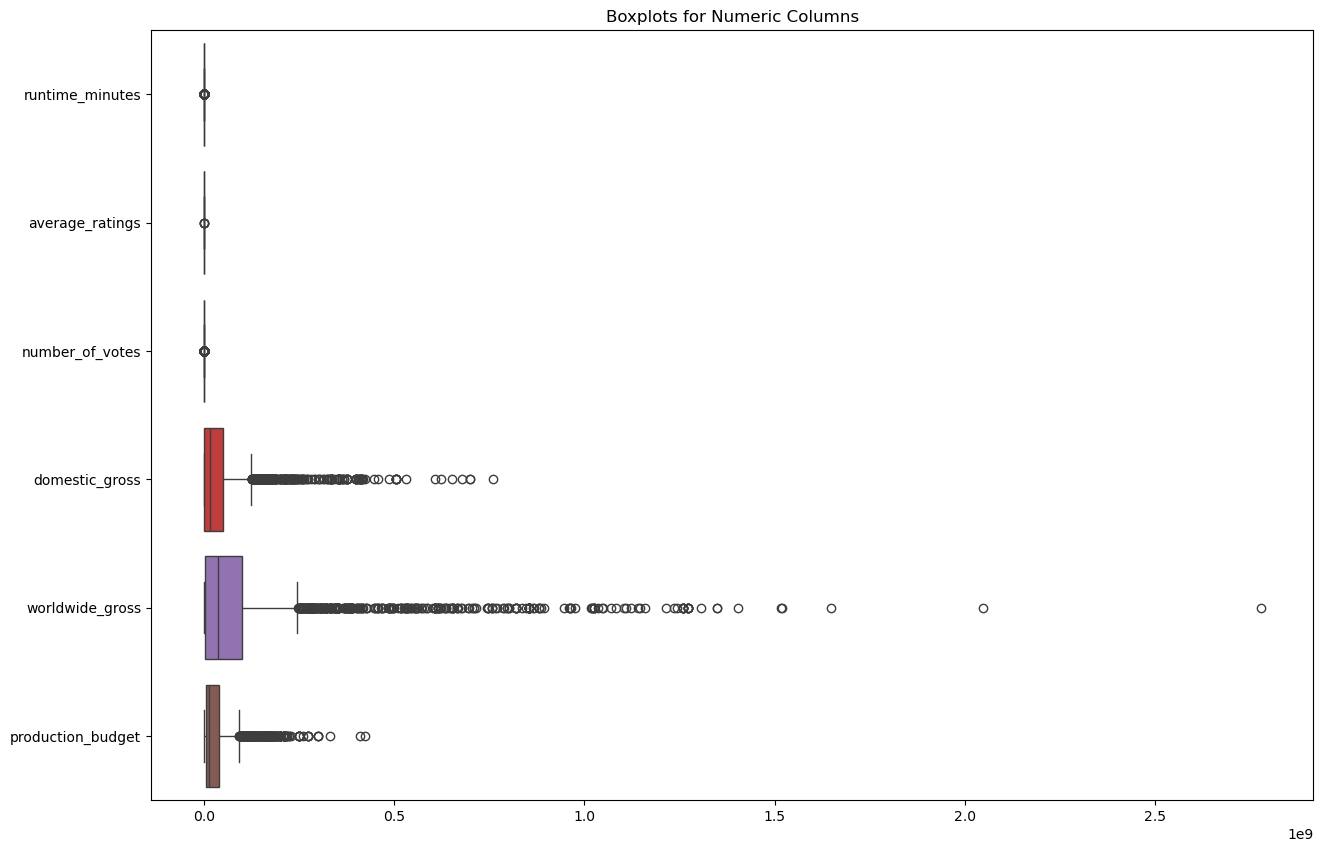

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns=combined[['runtime_minutes','average_ratings','number_of_votes','domestic_gross','worldwide_gross','production_budget','release_date_x']] 
# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns, orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

there's plenty of outliers in domestic_gross,production_budget and worldwide_gross but we decided to keep them since they are sensitive columns

### Feature engineering
this involes making of new columns or transforming existing features

#### total gross

In [42]:
#creating new features
combined['Total_gross']=(combined['domestic_gross']+combined['worldwide_gross'])
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272


#### ROI
Return on Investment (ROI) is a financial metric used to evaluate the profitability or performance of an investment relative to its cost. 

It is often expressed as a percentage and helps investors and businesses assess the efficiency and potential return of an investment.

Return on Investment (ROI):(gross−Budget)/Budget

In [43]:
#creating new features
combined['ROI']=((combined['Total_gross']-combined['production_budget'])/combined['production_budget'])*100
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706,-99.836209
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804,1037.902000
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130,-59.863480
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021,170.437386
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272,214.736686


#### movie age and movie age label

In [44]:
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Calculate the movie age
combined['movie_age'] = current_year - combined['release_date_x'].dt.year

# Label movies based on their age
def label_movie_by_age(age):
    if age <= 5:
        return 'New Release'
    elif 6 <= age <= 10:
        return 'Recent'
    elif 11 <= age <= 20:
        return 'Old'
    elif age > 20:
        return 'Classic'

# Apply the function to the 'movie_age' column
combined['movie_age_label'] = combined['movie_age'].apply(label_movie_by_age)

# Check the result
print(combined[['release_date_x', 'movie_age', 'movie_age_label']].head())


  release_date_x  movie_age movie_age_label
0     2013-05-07         12             Old
1     2015-06-19         10          Recent
2     2012-12-21         13             Old
3     2013-12-25         12             Old
4     2014-09-19         11             Old


In [45]:
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,movie_age,movie_age_label
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706,-99.836209,12,Old
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804,1037.902000,10,Recent
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130,-59.863480,13,Old
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021,170.437386,12,Old
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272,214.736686,11,Old


#### seasons column

In [46]:
# Extract 'Year' from the 'Date' column
combined['month'] = combined['release_date_x'].dt.month

def categorize_seasons(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
    
combined['season'] = combined['month'].apply(categorize_seasons)

combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,movie_age,movie_age_label,month,season
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706,-99.836209,12,Old,5,Spring
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804,1037.902000,10,Recent,6,Summer
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130,-59.863480,13,Old,12,Winter
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021,170.437386,12,Old,12,Winter
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272,214.736686,11,Old,9,Fall


#### movie ratings

In [47]:
def movie_ratings(value):
    if value <= 4:
        return 'low'
    
    elif 5 <= value <= 7:
        return 'Average' 
    
    else:
        return 'High'
    
combined['movie_rating'] = combined['average_ratings'].apply(movie_ratings)  
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,movie_age,movie_age_label,month,season,movie_rating
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706,-99.836209,12,Old,5,Spring,low
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804,1037.902000,10,Recent,6,Summer,Average
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130,-59.863480,13,Old,12,Winter,Average
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021,170.437386,12,Old,12,Winter,Average
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272,214.736686,11,Old,9,Fall,Average


In [48]:
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 60 <= value <= 120:
        return 'Medium' 
    
    else:
        return 'Long'
    
combined['movie_length'] = combined['runtime_minutes'].apply(movie_duration)  
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,title,id_y,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,movie_age,movie_age_label,month,season,movie_rating,movie_length
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,Foodfight!,26,45000000,0,73706,73706,-99.836209,12,Old,5,Spring,low,Medium
1,88,Unkown,7,24,2015-06-19,The Overnight,21,200000,1109808,1165996,2275804,1037.902000,10,Recent,6,Summer,Average,Medium
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,On the Road,17,25000000,720828,9313302,10034130,-59.863480,13,Old,12,Winter,Average,Long
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,The Secret Life of Walter Mitty,37,91000000,58236838,187861183,246098021,170.437386,12,Old,12,Winter,Average,Medium
4,114,"Action,Crime,Drama",6,105116,2014-09-19,A Walk Among the Tombstones,67,28000000,26017685,62108587,88126272,214.736686,11,Old,9,Fall,Average,Medium


### final checks

In [49]:
#drop some irrelevant columns
combined.drop(columns=['id_y','title'], inplace=True)

In [50]:
combined.head()

,runtime_minutes,genres,average_ratings,number_of_votes,release_date_x,production_budget,domestic_gross,worldwide_gross,Total_gross,ROI,movie_age,movie_age_label,month,season,movie_rating,movie_length
0,91,"Action,Animation,Comedy",1,8248,2013-05-07,45000000,0,73706,73706,-99.836209,12,Old,5,Spring,low,Medium
1,88,Unkown,7,24,2015-06-19,200000,1109808,1165996,2275804,1037.902000,10,Recent,6,Summer,Average,Medium
2,124,"Adventure,Drama,Romance",6,37886,2012-12-21,25000000,720828,9313302,10034130,-59.863480,13,Old,12,Winter,Average,Long
3,114,"Adventure,Comedy,Drama",7,275300,2013-12-25,91000000,58236838,187861183,246098021,170.437386,12,Old,12,Winter,Average,Medium
4,114,"Action,Crime,Drama",6,105116,2014-09-19,28000000,26017685,62108587,88126272,214.736686,11,Old,9,Fall,Average,Medium


In [51]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3360
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   runtime_minutes    3149 non-null   int64         
 1   genres             3149 non-null   object        
 2   average_ratings    3149 non-null   int64         
 3   number_of_votes    3149 non-null   int64         
 4   release_date_x     3149 non-null   datetime64[ns]
 5   production_budget  3149 non-null   int64         
 6   domestic_gross     3149 non-null   int64         
 7   worldwide_gross    3149 non-null   int64         
 8   Total_gross        3149 non-null   int64         
 9   ROI                3149 non-null   float64       
 10  movie_age          3149 non-null   int32         
 11  movie_age_label    3149 non-null   object        
 12  month              3149 non-null   int32         
 13  season             3149 non-null   object        
 14  movie_rating 

In [52]:
# Save the DataFrame to a CSV file
combined.to_csv('combined_cleaned_dataset.csv', index=False)